## Original Strategy

Link: https://www.quantifiedstrategies.com/williams-r-trading-strategy/

### Original Graph

![Original Graph of Williams R Trading Strategy](Williams_R_Trading_Strategy.png)

### Original Stats

| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 3444686.00    |
| Net Profit                      | 3344686.00    |
| Net Profit %                    | 3344.69%      |
| Exposure %                      | 22.00%        |
| Net Risk Adjusted Return        | 15203.13%      |
| Annual Return %                 | 11.90%         |
| Risk Adjusted Return %          | 52.00%        |
| Transaction Costs               | 0.00          |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 598           |
| Avg. Profit/Loss                | N/A       |
| Avg. Profit/Loss %              | 0.60%         |
| Avg. Bars Held                  | N/A          |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | N/A    |
| Avg. Profit                     | N/A       |
| Avg. Profit %                   | N/A         |
| Avg. Bars Held                  | N/A          |
| Max. Consecutive Wins           | N/A            |
| Largest Win                     | N/A      |
| Bars in Largest Win             | N/A             |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      |  N/A  |
| Avg. Loss                       |  N/A    |
| Avg. Loss %                     |  N/A       |
| Avg. Bars Held                  |  N/A         |
| Max. Consecutive Losses         |  N/A            |
| Largest Loss                    |  N/A    |
| Bars in Largest Loss            |  N/A            |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A    |
| Max. Trade % Drawdown           | N/A       |
| Max. System Drawdown            | N/A    |
| Max. System % Drawdown          | -17.00%       |
| Recovery Factor                 | N/A          |
| CAR/MaxDD                       | N/A          |
| RAR/MaxDD                       | N/A          |
| Profit Factor                   | 2.2          |
| Payoff Ratio                    | N/A         |
| Standard Error                  | N/A      |
| Risk-Reward Ratio               | N/A          |

## My Recreation of Strategy

### Imports

In [1]:
import sys
from datetime import datetime

new_path = "../"
if new_path not in sys.path:  # Avoid adding duplicates
    sys.path.append(new_path)

import matplotlib.pyplot as plt
import backtrader as bt
import backtrader.analyzers as btanalyzers
import pandas as pd
import numpy as np

from analyzers import InMarketAnalyzer, CashValueAnalyzer, SortinoRatio
from strategies import StrategyBase
from utils import print_strategy_stats, get_buy_and_hold
from indicators import WilliamsR


### Strategy Implimentation

In [2]:
class WilliamsRStrategy(StrategyBase):
    params = (
        ("period", 2),
        ("upperband", -20.0),
        ("lowerband", -80.0),
    )

    def __init__(self):

        super().__init__()
        # Initialize Williams %R indicator
        self.williams_r = WilliamsR(
            self.datas[0],
            period=self.p.period,
            lowerband=self.p.lowerband,
            upperband=self.p.upperband,
        )

    def long_condition(self):
        if self.williams_r.lines.percR[0] < self.williams_r.p.lowerband:
            return True
        else:
            return False

    def close_condition(self):
        if (
            self.williams_r.lines.percR[0] > self.williams_r.p.upperband
            or self.datas[0].close[0] > self.datas[0].high[-1]
        ):
            return True
        else:
            return False

### Backtesting

#### COO: False, COC: False

In [3]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=False)
start_date = datetime(1993, 1, 29)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/SPY.csv', fromdate=start_date, todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(WilliamsRStrategy, period=2, upperband=-30.0, lowerband=-90.0)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(False)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1993-02-16, BUY EXECUTED, 24.906157
1993-02-23, SELL EXECUTED, 24.556114
1993-03-05, Buy Order Margin
1993-03-08, Buy Order Margin
1993-03-22, BUY EXECUTED, 25.094135
1993-03-24, SELL EXECUTED, 25.217227
1993-04-05, Buy Order Margin
1993-04-20, BUY EXECUTED, 25.146894
1993-04-28, SELL EXECUTED, 24.654504
1993-05-07, Buy Order Margin
1993-05-14, BUY EXECUTED, 24.777593
1993-05-18, SELL EXECUTED, 24.865535
1993-05-24, Buy Order Margin
1993-06-09, Buy Order Margin
1993-06-16, BUY EXECUTED, 25.287561
1993-06-18, SELL EXECUTED, 25.413665
1993-06-21, Buy Order Margin
1993-06-24, Buy Order Margin
1993-07-07, BUY EXECUTED, 25.041768
1993-07-09, SELL EXECUTED, 25.413658
1993-07-23, Buy Order Margin
1993-09-21, Buy Order Margin
1993-10-08, Buy Order Margin
1993-10-20, Buy Order Margin
1993-10-25, Buy Order Margin
1993-11-05, BUY EXECUTED, 26.070983
1993-11-09, SELL EXECUTED, 26.480837
1993-11-30, BUY EXECUTED, 26.391741
1993-12-06, SELL EXECUTED, 26.676871
199

In [4]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 446697.66      |
| Net Profit                      | 346697.66 |
| Net Profit %                    | 149.67%    |
| Exposure %                      | 10.99%           |
| Net Risk Adjusted Return        | 44.40%      |
| Annual Return %                 | 4.88%   |
| Risk Adjusted Return %          | 44.40%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 267            |
| Avg. Profit/Loss                | 1.30                        |
| Avg. Profit/Loss %              | 0.56%|
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|-------------------


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 446697.66      |
| Net Profit                      | 346697.66 |
| Net Profit %                    | 149.67%    |
| Exposure %                      | 10.99%           |
| Net Risk Adjusted Return        | 44.40%      |
| Annual Return %                 | 4.88%   |
| Risk Adjusted Return %          | 44.40%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 267            |
| Avg. Profit/Loss                | 1.30                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 694342.22         |
| Avg. Profit                     | 3579.08     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 14      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -347644.56        |
| Avg. Loss                       | -4762.25    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 4     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 48388.91     |
| Max. System % Drawdown          | 17.06% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 1.9972762389378986                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



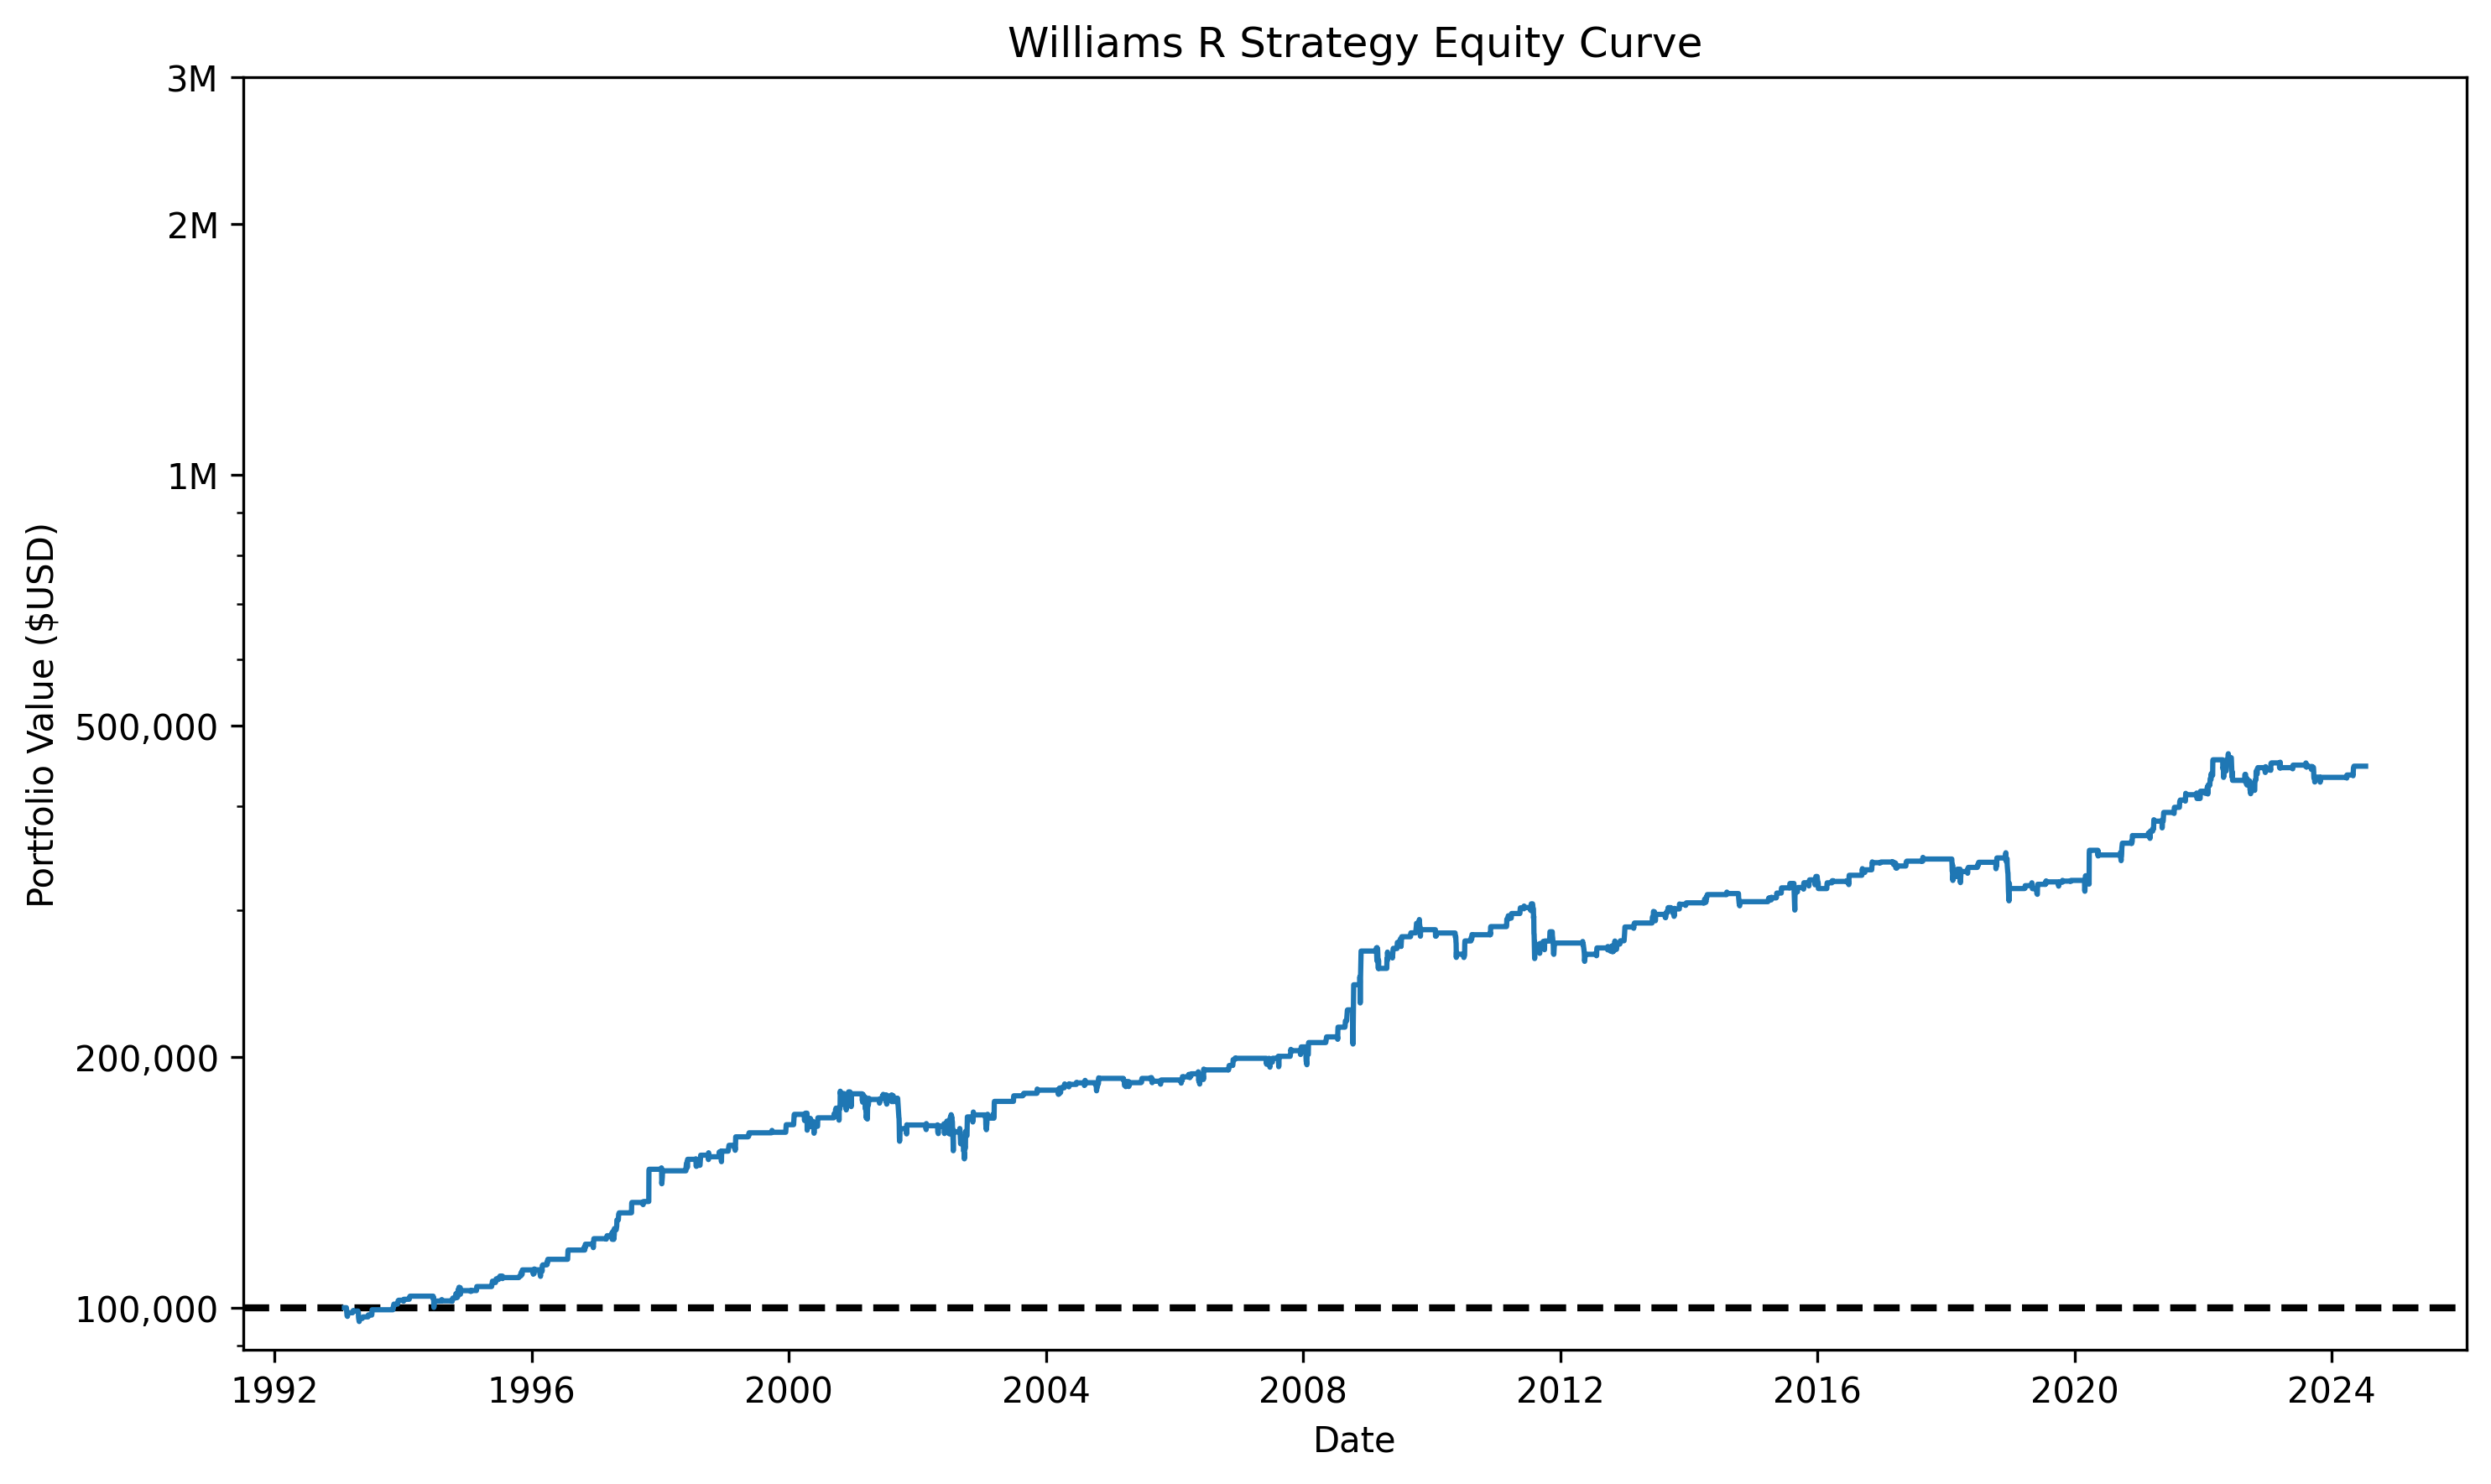

In [5]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

plt.plot(strat[0].dates,strat[0].equity_curve)
plt.title(f"Williams R Strategy Equity Curve")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.tight_layout()

#### COO: True

In [6]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=True)
start_date = datetime(1993, 1, 29)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/SPY.csv', fromdate=start_date, todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(WilliamsRStrategy, period=2, upperband=-30.0, lowerband=-90.0)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(False)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1993-02-16, BUY EXECUTED, 24.906157
1993-02-23, SELL EXECUTED, 24.556114
1993-03-05, BUY EXECUTED, 25.168706
1993-03-09, SELL EXECUTED, 25.571268
1993-03-22, BUY EXECUTED, 25.094135
1993-03-24, SELL EXECUTED, 25.217227
1993-04-05, BUY EXECUTED, 25.006214
1993-04-08, SELL EXECUTED, 25.058969
1993-04-20, BUY EXECUTED, 25.146894
1993-04-28, SELL EXECUTED, 24.654504
1993-05-07, BUY EXECUTED, 25.023786
1993-05-12, SELL EXECUTED, 25.006214
1993-05-14, BUY EXECUTED, 24.777593
1993-05-18, SELL EXECUTED, 24.865535
1993-05-24, BUY EXECUTED, 25.234829
1993-05-27, SELL EXECUTED, 25.692028
1993-06-09, BUY EXECUTED, 25.252398
1993-06-14, SELL EXECUTED, 25.410658
1993-06-16, BUY EXECUTED, 25.287561
1993-06-18, SELL EXECUTED, 25.413665
1993-06-21, BUY EXECUTED, 25.289696
1993-06-23, SELL EXECUTED, 25.289694
1993-06-24, BUY EXECUTED, 25.130316
1993-06-25, SELL EXECUTED, 25.378244
1993-07-07, BUY EXECUTED, 25.041768
1993-07-09, SELL EXECUTED, 25.413658
1993-07-23, BUY

In [7]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 1770620.47      |
| Net Profit                      | 1670620.47 |
| Net Profit %                    | 287.39%    |
| Exposure %                      | 21.68%           |
| Net Risk Adjusted Return        | 44.17%      |
| Annual Return %                 | 9.58%   |
| Risk Adjusted Return %          | 44.17%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 579            |
| Avg. Profit/Loss                | 2.89                        |
| Avg. Profit/Loss %              | 0.50%|
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|-----------------


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 1770620.47      |
| Net Profit                      | 1670620.47 |
| Net Profit %                    | 287.39%    |
| Exposure %                      | 21.68%           |
| Net Risk Adjusted Return        | 44.17%      |
| Annual Return %                 | 9.58%   |
| Risk Adjusted Return %          | 44.17%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 579            |
| Avg. Profit/Loss                | 2.89                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 3486122.22         |
| Avg. Profit                     | 8202.64     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 15      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -1815501.75        |
| Avg. Loss                       | -11788.97    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 4     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 266051.14     |
| Max. System % Drawdown          | 20.11% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 1.9201976647005299                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



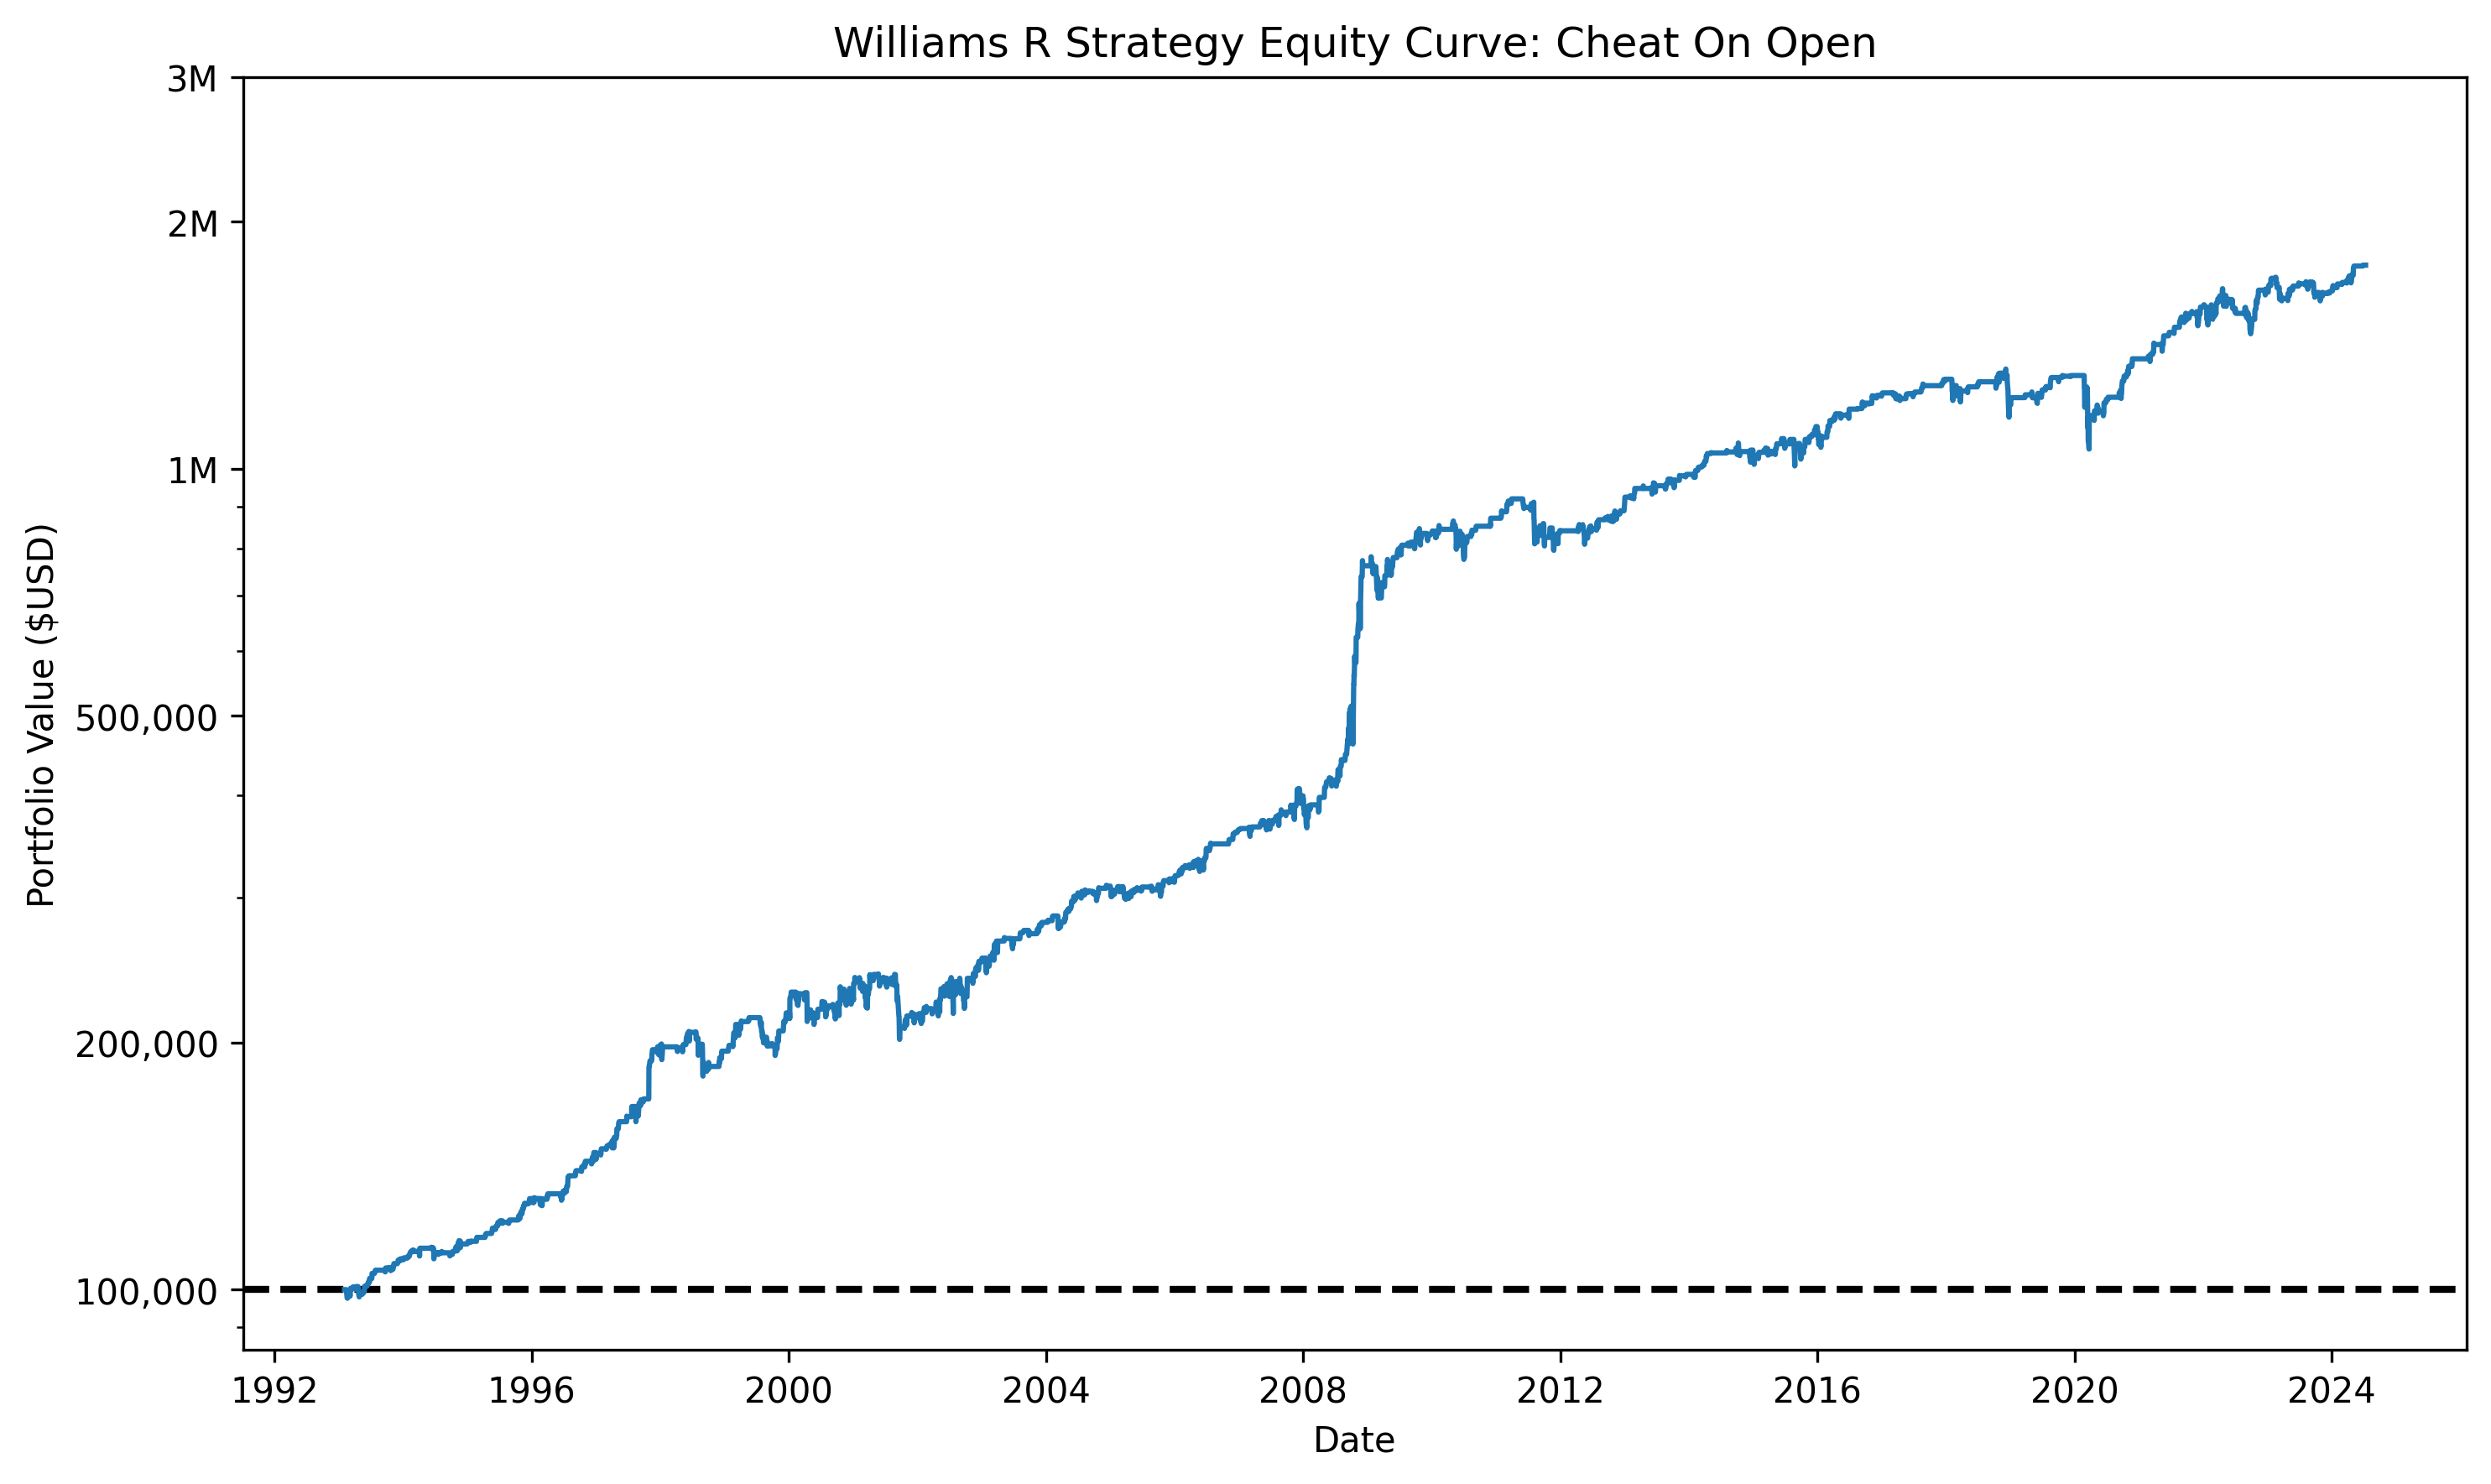

In [8]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

plt.plot(strat[0].dates,strat[0].equity_curve)
plt.title(f"Williams R Strategy Equity Curve: Cheat On Open")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.tight_layout()

#### COC: True

In [9]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=False)
start_date = datetime(1993, 1, 29)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/SPY.csv', fromdate=start_date, todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(WilliamsRStrategy, period=2, upperband=-30.0, lowerband=-90.0)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(True)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1993-02-16, BUY EXECUTED, 24.976181
1993-02-23, SELL EXECUTED, 24.486105
1993-03-05, BUY EXECUTED, 25.133701
1993-03-09, SELL EXECUTED, 25.623783
1993-03-22, BUY EXECUTED, 25.340317
1993-03-24, SELL EXECUTED, 25.252398
1993-04-05, BUY EXECUTED, 24.812773
1993-04-08, SELL EXECUTED, 24.953445
1993-04-20, BUY EXECUTED, 25.182058
1993-04-28, SELL EXECUTED, 24.689682
1993-05-07, BUY EXECUTED, 25.006214
1993-05-12, SELL EXECUTED, 25.111725
1993-05-14, BUY EXECUTED, 24.777599
1993-05-18, SELL EXECUTED, 24.847944
1993-05-24, BUY EXECUTED, 25.182058
1993-05-27, SELL EXECUTED, 25.656876
1993-06-09, BUY EXECUTED, 25.164482
1993-06-14, SELL EXECUTED, 25.375496
1993-06-16, BUY EXECUTED, 25.287584
1993-06-18, SELL EXECUTED, 25.428253
1993-06-21, BUY EXECUTED, 25.218857
1993-06-23, SELL EXECUTED, 25.289698
1993-06-24, BUY EXECUTED, 25.059465
1993-06-25, SELL EXECUTED, 25.395964
1993-07-07, BUY EXECUTED, 25.059465
1993-07-09, SELL EXECUTED, 25.413662
1993-07-23, BUY

In [10]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 3063591.39      |
| Net Profit                      | 2963591.39 |
| Net Profit %                    | 342.22%    |
| Exposure %                      | 21.58%           |
| Net Risk Adjusted Return        | 53.31%      |
| Annual Return %                 | 11.51%   |
| Risk Adjusted Return %          | 53.31%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 583            |
| Avg. Profit/Loss                | 5.08                        |
| Avg. Profit/Loss %              | 0.59%|
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|----------------


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 3063591.39      |
| Net Profit                      | 2963591.39 |
| Net Profit %                    | 342.22%    |
| Exposure %                      | 21.58%           |
| Net Risk Adjusted Return        | 53.31%      |
| Annual Return %                 | 11.51%   |
| Risk Adjusted Return %          | 53.31%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 583            |
| Avg. Profit/Loss                | 5.08                        |
| Avg. Profit/Loss %              | 0.59%|
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 5021092.45         |
| Avg. Profit                     | 11983.51     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 12      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -2057501.06        |
| Avg. Loss                       | -12545.74    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 4     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 243056.47     |
| Max. System % Drawdown          | 16.24% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 2.4403838923666354                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



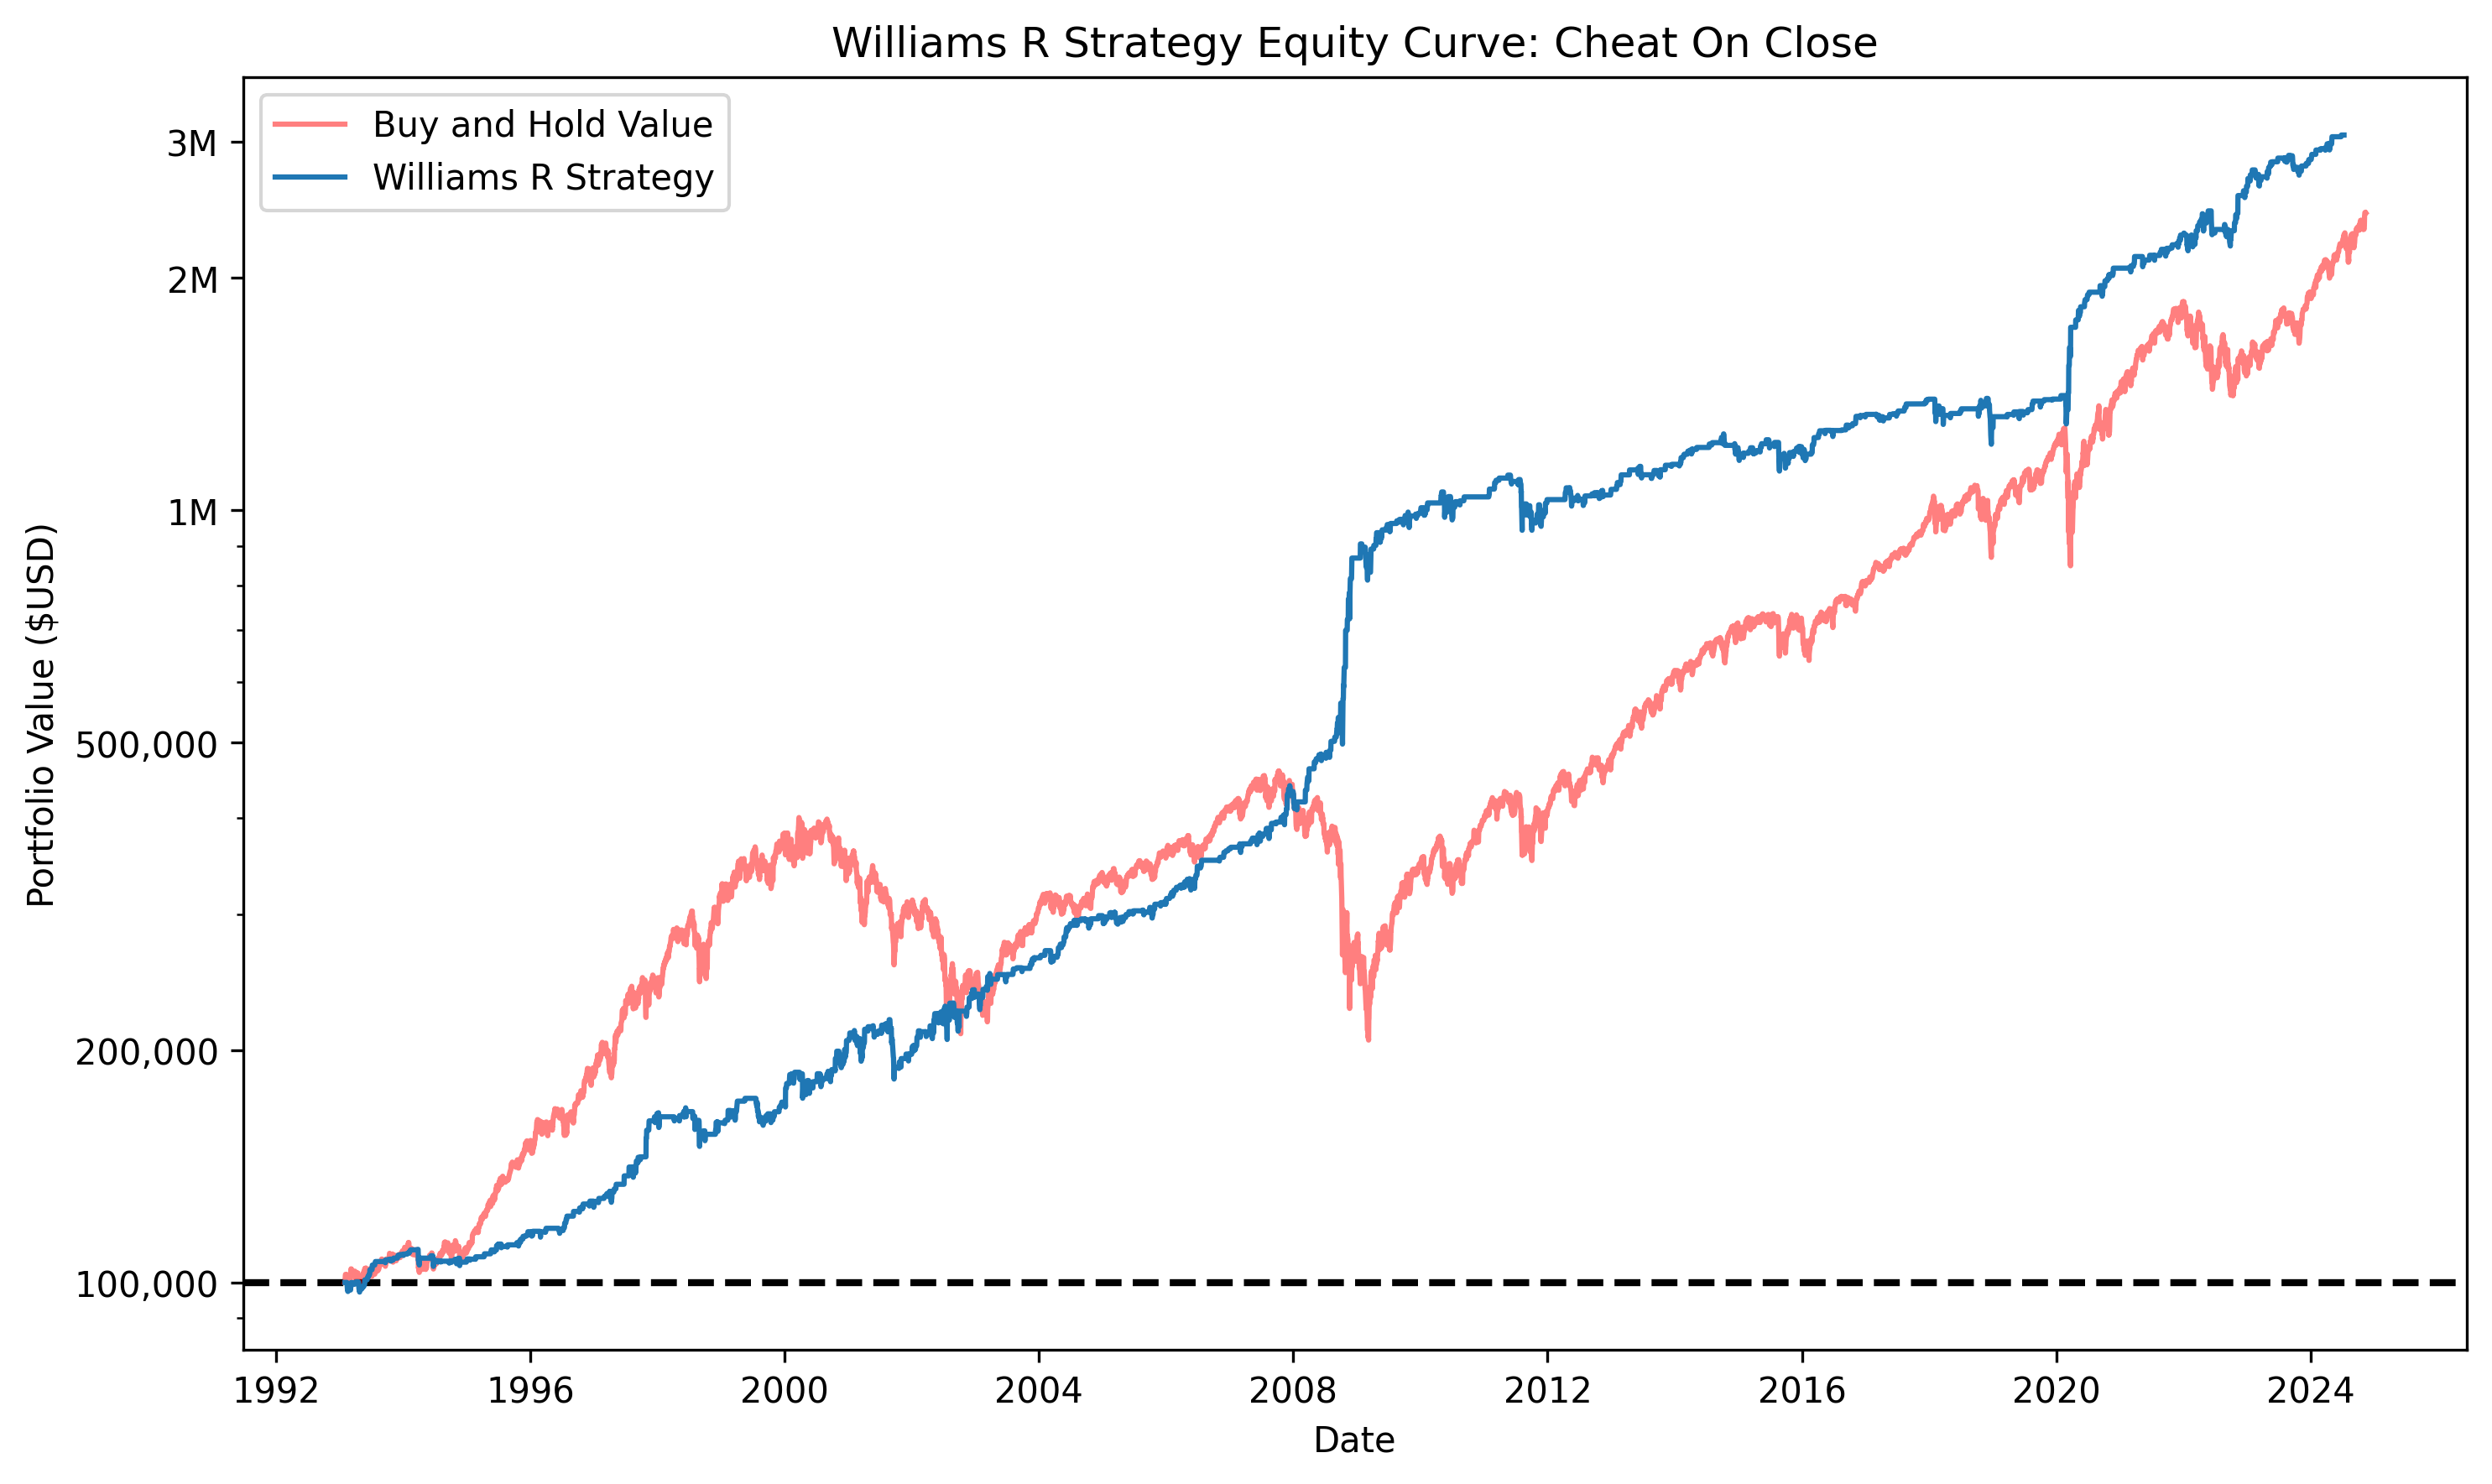

In [12]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

data = get_buy_and_hold("../data/SPY.csv", 
                        initial_investment=100000, datetime=True)

plt.plot(data['Date'], data['BuyAndHoldValue'], 
         label='Buy and Hold Value', color='red', alpha=0.5)

plt.plot(strat[0].dates,strat[0].equity_curve,
         label='Williams R Strategy')
plt.title(f"Williams R Strategy Equity Curve: Cheat On Close")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)
plt.legend()

plt.tight_layout()